# COGS 108 - Final Project 

# Overview

This prrject studies the effect of past inspections and violations to future scores and violations in food facilities in North Carolina. The Food Branch of the Food and Drug Protection Division of North Carolina conduct routine health inspections on food facilieties. I want to find out if these inspections could stimulate businesses to improve their quality of food and reduce potential healh-related risks. This study covers three major types of food facilities:  like restaurants, food stands, and public school lunchrooms. 

# Name & GitHub ID

- Name: Yuan Lin
- GitHub Username: A15640636

# Research Question

Do previous health inspections and violations stimulate different food facilities to pursue higher standard and quality in North Carolina?

## Background and Prior Work

Food Regulatory Specialists of the Food Branch of the Food and Drug Protection Division of NC performs are in charge of routinely inspected food faciliteis without prior anouncement to ensure the credibility and sanitation of food and food producing, storing, and distributing process. According to the Food and Agriculture Organizaiont of the United States, food inspections have shifted the main focus from reaction to prevention. This means that wether food inspections results affect the performance in future inspections is crucial and a criterion to judge the effectiveness of the system of inspection. 

According to a research conducted by Sarah E. Leinwand in Philadelphia, Pennsylvania in 2013-2014, based on wether or not the restaurants are chained, the frequency of food inspections by the public health departments in Philadelphia ] reduce violations. The reduce is more significant in restaurants that have most violations. Thus, increasing the number of inspections conducted each year would result in preventing or reducing future violations. This research categorized restaurants into chained and non-chained and found no difference between the results of two. 



References (include links):
- 1) https://ehs.ncpublichealth.com/faf/docs/foodprot/NC-FoodCodeManual-2009-FINAL.pdf
- 2) http://www.fao.org/food/food-safety-quality/capacity-development/inspection/en/
- 3) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/

# Hypothesis


Health inspections do not stimulate food facilites to perform well in future inspections in North Carolina. The concern is that the majority of customers wouldn't check the health inspections records before dining in those food facilities. Many restaurants are shown to have a huge amount of critical and noncritical violations even if they were inspected many times. Thus, health inspections might not perform effectiveness in stimulating restaurants to improve. 

# Dataset(s)

*Fill in your dataset information here*

- Dataset Name: inspections.csv
- Link to the dataset: Dataset was provided
- Number of observations: 18466

This dataset describes health inspections conducted on food facilities in the state of North Carolina. The dataset includes basic informations of the food facilities and the violations they have. For variables, I will have the number of inspections, the facility type, number of critical and noncritical violations now and before, and days since inspections. They will be stored in a pandas DataFrame. I will keep all the observation that contains no null values. 

# Setup

In [14]:
#import all the packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

In [35]:
inspections = pd.read_csv('inspections.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [39]:
inspections.head()

,days_since_previous_inspection,facilitytype,inspection_num,num_critical,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous
398,42.0,Institutional Food Service,2,4,3,8.0,7.0,8.0,7.0
496,46.0,Restaurant,2,5,7,11.0,4.0,11.0,4.0
630,69.0,Public School Lunchrooms,2,2,3,1.0,3.0,1.0,3.0
640,69.0,Private School Lunchrooms,2,1,0,5.0,7.0,5.0,7.0
652,58.0,Restaurant,2,4,9,3.0,6.0,3.0,6.0


In [40]:
# drop unwanted columns
inspections = inspections[['days_since_previous_inspection', 
                           'facilitytype', 
                           'inspection_num', 
                           'num_critical',
                           'num_non_critical', 
                           'num_critical_previous', 
                           'num_non_critical_previous', 
                           'num_critical_mean_previous',
                           'num_non_critical_mean_previous']]

In [41]:
# drop observations with null value and check
inspections = inspections.dropna()
inspections.isnull().sum()

days_since_previous_inspection    0
facilitytype                      0
inspection_num                    0
num_critical                      0
num_non_critical                  0
num_critical_previous             0
num_non_critical_previous         0
num_critical_mean_previous        0
num_non_critical_mean_previous    0
dtype: int64

In [43]:
# group observations by facilitytype and get the count of each type
inspections.groupby(by = 'facilitytype').count().get('inspection_num').sort_values(ascending = False)

facilitytype
Restaurant                           9932
Food Stand                           2683
Public School Lunchrooms             1428
Meat Market                           642
Institutional Food Service            313
Mobile Food Units                     152
Private School Lunchrooms             120
Pushcarts                              90
Elderly Nutrition Sites (catered)      61
Name: inspection_num, dtype: int64

In [44]:
inspections = inspections.rename(columns = {'num_non_critical' : 'Non Critical', 
                                            'num_critical' : 'Critical', 
                                            'Inspection Num' : 'inspection_num', 
                                            'num_non_critical_previous' : 'Previous Non Critical', 
                                            'num_critical_previous' : 'Previous Critical', 
                                            'num_critical_mean_previous' : 'Critical Mean',
                                            'num_non_critical_mean_previous' : 'Non Critical Mean',
                                            'inspection_num' : 'Inspection Number',
                                            'days_since_previous_inspection' : 'Day from Last Inspection'
                                            })
inspections

,Day from Last Inspection,facilitytype,Inspection Number,Critical,Non Critical,Previous Critical,Previous Non Critical,Critical Mean,Non Critical Mean
398,42.0,Institutional Food Service,2,4,3,8.0,7.0,8.000000,7.000000
496,46.0,Restaurant,2,5,7,11.0,4.0,11.000000,4.000000
630,69.0,Public School Lunchrooms,2,2,3,1.0,3.0,1.000000,3.000000
640,69.0,Private School Lunchrooms,2,1,0,5.0,7.0,5.000000,7.000000
652,58.0,Restaurant,2,4,9,3.0,6.0,3.000000,6.000000
669,70.0,Public School Lunchrooms,2,0,2,1.0,1.0,1.000000,1.000000
735,78.0,Public School Lunchrooms,2,3,1,4.0,4.0,4.000000,4.000000
769,87.0,Public School Lunchrooms,2,3,3,0.0,3.0,0.000000,3.000000
828,87.0,Restaurant,2,1,1,0.0,4.0,0.000000,4.000000
854,70.0,Restaurant,2,3,2,7.0,3.0,7.000000,3.000000


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [45]:
restaurants = inspections[inspections.facilitytype == 'Restaurant'].drop(columns = ['facilitytype'])
food_stands = inspections[inspections.facilitytype == 'Food Stand'].drop(columns = ['facilitytype'])
public_school_lunchrooms = inspections[inspections.facilitytype == 'Public School Lunchrooms'].drop(columns = ['facilitytype'])

In [46]:
restaurants_mean = restaurants[['Non Critical', 'Critical']].mean()
food_stands_mean = food_stands[['Non Critical', 'Critical']].mean()
public_school_lunchrooms_mean = public_school_lunchrooms[['Non Critical', 'Critical']].mean()

Text(0,0.5,'Violation Mean')

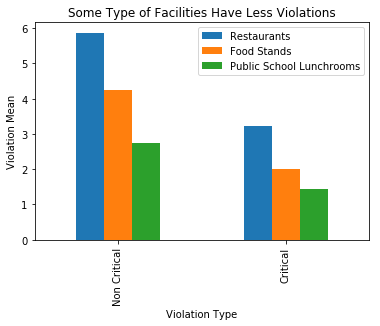

In [47]:
violations = pd.DataFrame({'Restaurants' : restaurants_mean, 'Food Stands' : food_stands_mean, 'Public School Lunchrooms' : public_school_lunchrooms_mean})
violations.plot(kind = 'bar')
plt.title('Some Type of Facilities Have Less Violations')
plt.xlabel('Violation Type')
plt.ylabel('Violation Mean')

Text(0,0.5,'Violation Mean')

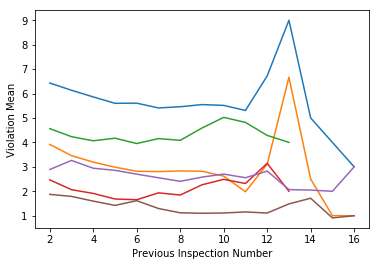

In [48]:
restaurants_scores = restaurants[['Inspection Number', 'Non Critical', 'Critical']].groupby(by = 'Inspection Number').mean()
food_stands_scores = food_stands[['Inspection Number', 'Non Critical', 'Critical']].groupby(by = 'Inspection Number').mean()
public_school_lunchrooms_scores = public_school_lunchrooms[['Inspection Number', 'Non Critical', 'Critical']].groupby(by = 'Inspection Number').mean()
index = restaurants_scores.index
plt.plot(index, restaurants_scores, label = 'line1')
plt.plot(index[:12], food_stands_scores, label = 'line2')
plt.plot(index, public_school_lunchrooms_scores, label = 'line3')
plt.xlabel('Previous Inspection Number')
plt.ylabel('Violation Mean')

In [49]:
inspections.head()

,Day from Last Inspection,facilitytype,Inspection Number,Critical,Non Critical,Previous Critical,Previous Non Critical,Critical Mean,Non Critical Mean
398,42.0,Institutional Food Service,2,4,3,8.0,7.0,8.0,7.0
496,46.0,Restaurant,2,5,7,11.0,4.0,11.0,4.0
630,69.0,Public School Lunchrooms,2,2,3,1.0,3.0,1.0,3.0
640,69.0,Private School Lunchrooms,2,1,0,5.0,7.0,5.0,7.0
652,58.0,Restaurant,2,4,9,3.0,6.0,3.0,6.0


In [65]:
inspections = inspections.assign(diff = restaurants.get('Critical')
                                       + restaurants.get('Non Critical')
                                       - restaurants.get('Critical Mean')
                                       - restaurants.get('Non Critical Mean')
                                       )
inspections = inspections.dropna()

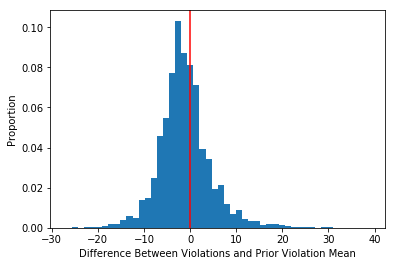

In [72]:
plt.hist(inspections['diff'], density=True, bins=50, label="Data")
plt.xlabel('Difference Between Violations and Prior Violation Mean')
plt.ylabel('Proportion')
plt.axvline(x=0, color = 'r')

In [67]:
stats.ttest_1samp(inspections['diff'], 0)

Ttest_1sampResult(statistic=-20.43827551083817, pvalue=5.595110663656939e-91)

# Ethics & Privacy

Since this is a public record, it is important to not include the information of inspectors. A result we found is that different types of food facilities have difference mean violations in each inspecion. Food and Drug Protection Division of NC might use this result to enact unfair regulations and unfair frequency of inspections towards different type of food faciliteis. 

# Conclusion & Discussion

A result we found is that public school lunchrooms in North Carolina is doing a better job in lowering violations than food stands and restaurants. 

Since the p-value is significantly less than 0.05, we reject the null hypothesis that previous inspections do not affect future violations. My hypothesis is wrong. Previous food inspections and violation does increase the standard of food by reduce violations in later inspections. The line plot also shows a decreasing trend in violations as the number of previous inspections increase. 

An issue that I encountered is that not all food facilities have the same frequency of inspections, which means that as the number of inspections increases, the number of observations goes down. We don't know what determined the frequency of inspections, either if the food facilities are good or bad. This might produce bias in comparing the number of inspections to the average violations. 